<div style="text-align: center; font-size: 40px; font-weight: bold;">
    FORECASTING BIOMASS ENERGY 
   
</div>

<div style="text-align: center; font-size: 24px;">
    Author: Marta Afifah
</div>


# **0 - Import Data & Library**

In [10]:
#Import Library yang dibutuhkan
library(readxl)
library(ggplot2)
#install.packages("forecast")
library(forecast)
library(tseries)
library(lmtest)

In [11]:
#Import data yang dibutuhkan
df = read_excel("/kaggle/input/data-tugas-2/Biomass Energy.xlsx")

#Ubah data ke time series
data = ts(df[2], start = c(2011), freq = 12)
data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2011,207.060,184.222,200.554,189.617,191.999,196.070,199.307,200.526,194.421,198.456,201.645,210.876
2012,205.492,192.318,197.718,188.655,197.527,192.347,195.031,198.249,190.465,195.090,194.325,201.494
2013,200.810,181.051,199.254,194.188,201.422,199.863,209.470,204.328,193.617,204.291,204.671,214.401
2014,208.328,188.557,206.975,201.552,204.793,205.116,211.698,210.433,199.290,206.982,204.666,217.277
2015,214.390,192.022,205.826,200.991,208.068,204.217,211.552,210.317,201.339,205.536,205.950,214.119
2016,211.112,198.757,207.986,194.626,205.215,203.723,209.805,211.066,198.673,205.517,207.381,233.200
2017,213.033,192.490,210.568,197.389,204.505,203.622,209.440,213.439,197.284,207.303,209.641,216.728
2018,212.713,191.813,210.210,198.760,208.098,202.583,212.683,212.902,197.147,206.908,204.006,213.549
2019,209.137,189.438,203.741,195.684,202.533,199.477,206.584,205.759,191.643,200.782,201.216,210.497
2020,210.185,195.620,198.288,163.643,175.854,179.696,188.109,188.646,182.848,193.408,193.415,200.280


## **Pola dan Karakteristik Data**

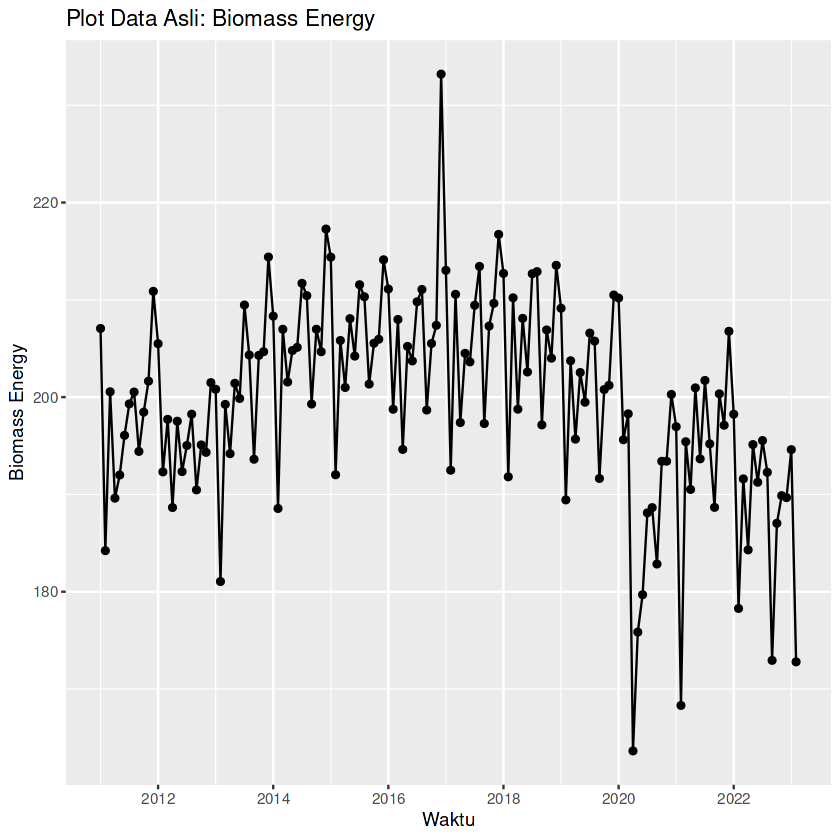

In [12]:
#Plot data Biomass Energy
autoplot(data)+xlab("Waktu")+
    ylab("Biomass Energy") +
    ggtitle("Plot Data Asli: Biomass Energy") + geom_point()

Dari plot di atas, dapat diketahui bahwa data berubah secara fluktuatif dari waktu ke waktu dan tidak memiliki pola musiman atau tren tertentu. Selain itu, dari plot di atas juga dapat dikatakan bahwa data cenderung tidak stasioner.

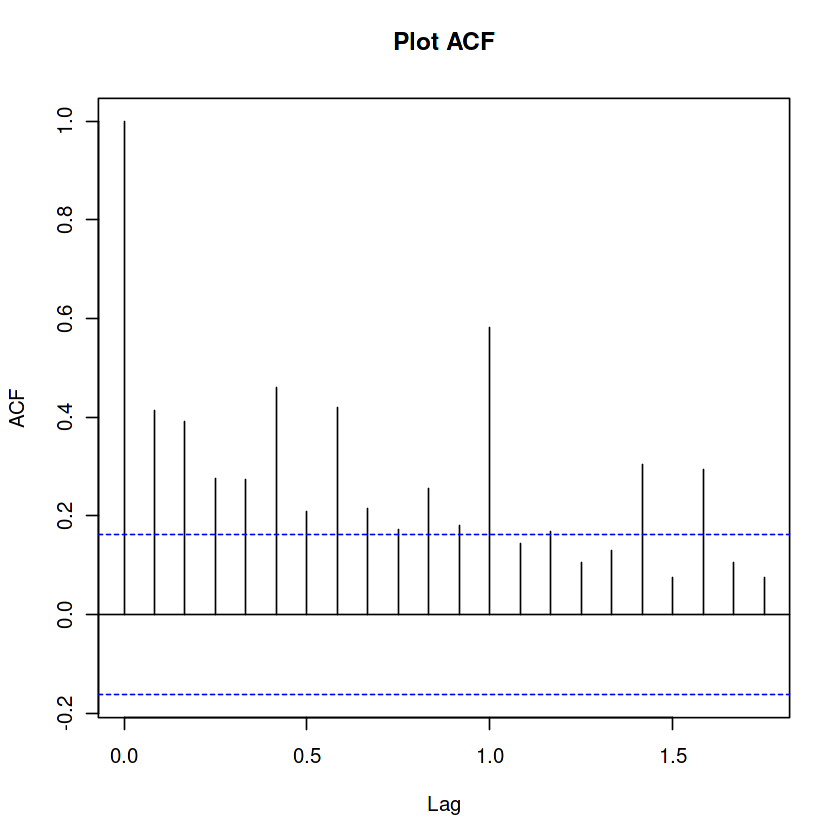

In [13]:
#Membuat PLot ACF untuk melihat stasioneritas data secara eksploratif
acf(data, main = "Plot ACF")

Berdasarkan plot ACF di atas, dapat dikatakan bahwa ACF memiliki tren penurunan,
dan nilainya semakin mendekati 0 seiring bertambahnya lag. Oleh karena itu, dapat
dikatakan bahwa data tidak stasioner, tetapi untuk lebih tepatnya digunakan uji
secara inferensi dengan ADF Test.

In [14]:
#Uji Stasioneritas secara inferensi dengan ADF Test
adf.test(data)


	Augmented Dickey-Fuller Test

data:  data
Dickey-Fuller = -2.778, Lag order = 5, p-value = 0.2524
alternative hypothesis: stationary


Dengan menyatakan H0: Data tidak stasioner; H1: Data stasioner dan tingkat
signifikansi α = 0,05 dengan daerah kritik H0 ditolak apabila p-value < α. Diperoleh nilai p-value sebesar 0,2524 > 0,05 = α sehingga H0 tidak ditolak. Oleh karena itu, dapat disimpulkan bahwa data biomass energy tidak stasioner.

## **ARIMA**

### Menetukan parameter

Dalam pemodelan ARIMA diperlukan differencing terlebih dahulu pada pemodelan data yang tidak stasioner. Akan dilakukan penentuan parameter differencing sebagai berikut:

In [15]:
#Transforming Data
##Checking the Number of Differences Required
ndiffs(log(data),"adf")

Warning message in ndiffs(log(data), "adf"):
“Specified alpha value is larger than the maximum, setting alpha=0.1”


[1] 1

Diperoleh bahwa jumlah differencing yang mungkin untuk dilakukan adalah 1. Oleh karena itu akan dilakukan differencing sebanya satu kali pada data biomass energy.

Warning message in adf.test(ddif1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ddif1
Dickey-Fuller = -9.1736, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


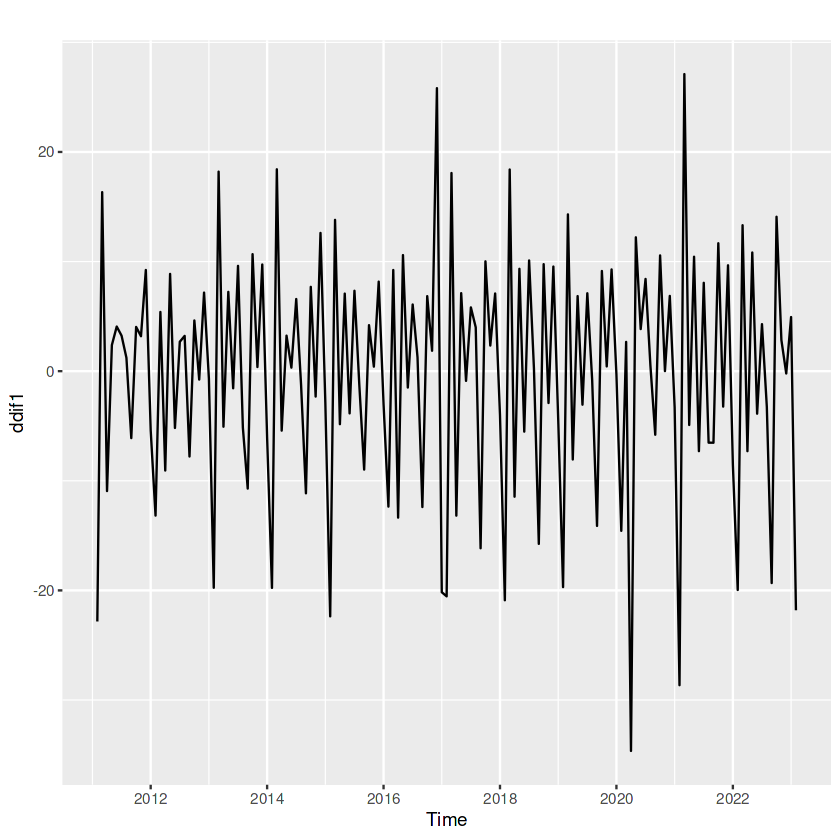

In [16]:
##Diff 1
ddif1 = diff(data, differences=1)
adf.test(ddif1)
autoplot(ddif1)
#lebih bagus

Berdasarkan hasil di atas, dapat dikatakan bahwa hasil differencing, sebanyak satu kali, dari data biomass energy tidak memiliki pola musiman atau tren tertentu, atau dapat dikatakan bahwa data hasil differencing sebanyak satu kali sudah stasioner.

Dari ADF Test, diperoleh nilai p-value < 0,01 < 0,05 = α sehingga H0 ditolak. Oleh karena itu, dapat disimpulkan bahwa data differencing sebanyak satu kali dari data biomass energy stasioner.

Warning message in adf.test(dtrans1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  dtrans1
Dickey-Fuller = -9.0382, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


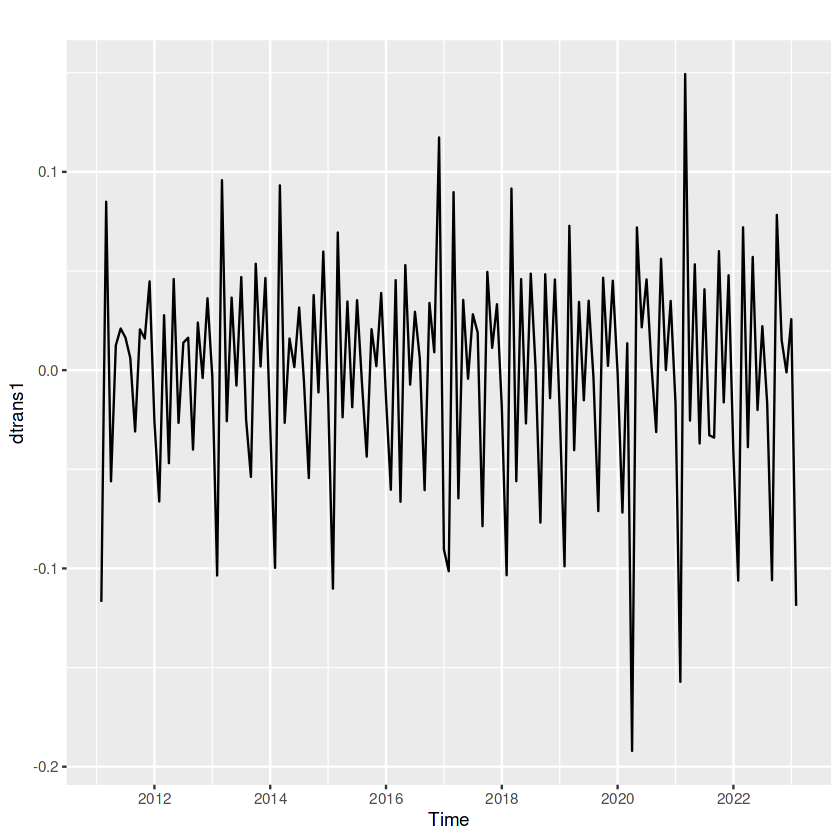

In [17]:
#Diff 1 with Log-Trans
dtrans1 = diff(log(data), differences=1)
adf.test(dtrans1)
autoplot(dtrans1)

Berdasarkan hasil di atas, dapat dikatakan bahwa hasil differencing, sebanyak satu kali, dari transformasi logaritma data biomass energy, tidak memiliki pola musiman atau tren tertentu, atau dapat dikatakan bahwa hasil differencing, sebanyak satu kali, dari transformasi logaritma data biomass energy sudah stasioner.

Hasil ADF Test juga menunjukkan bahwa nilai p-value < 0,01 < 0,05 = α sehingga H0 ditolak. Oleh karena itu, dapat disimpulkan bahwa data hasil differencing, sebanyak satu kali, dari transformasi logaritma data biomass energy stasioner.

### Penentuan parameter d
Karena differencing pada data yang dilakukan transformasi logaritma ataupun tidak sama-sama menghasilkan data yang stasioner, maka akan dipilih hasil yang terbaik dengan menggunakan nilai mutlak dari Dickey Fuller. Jika dilihat dari nilai Dickey Fuller-nya, diperoleh bahwa nilai mutlak DF hasil differencing sebanyak satu kali (= 9,1736) lebih besar daripada hasil differencing data dengan transformasi logaritma (=9,0382). Artinya, data yang hanya dilakukan differencing sebanyak satu kali memiliki stasioneritas yang lebih baik dibanding dengan differencing data yang dilakukan transformasi logaritma. Oleh karena itu, akan dilakukan differencing sebanyak satu kali saja, tanpa transformasi logaritma, untuk analisis selanjutnya. Dari hasil differencing data sebanyak satu kali sudah menghasilkan data yang stasioner. Oleh karena itu, diperoleh nilai parameter d untuk model ARIMA adalah 1.

### Penentuan parameter p dan q

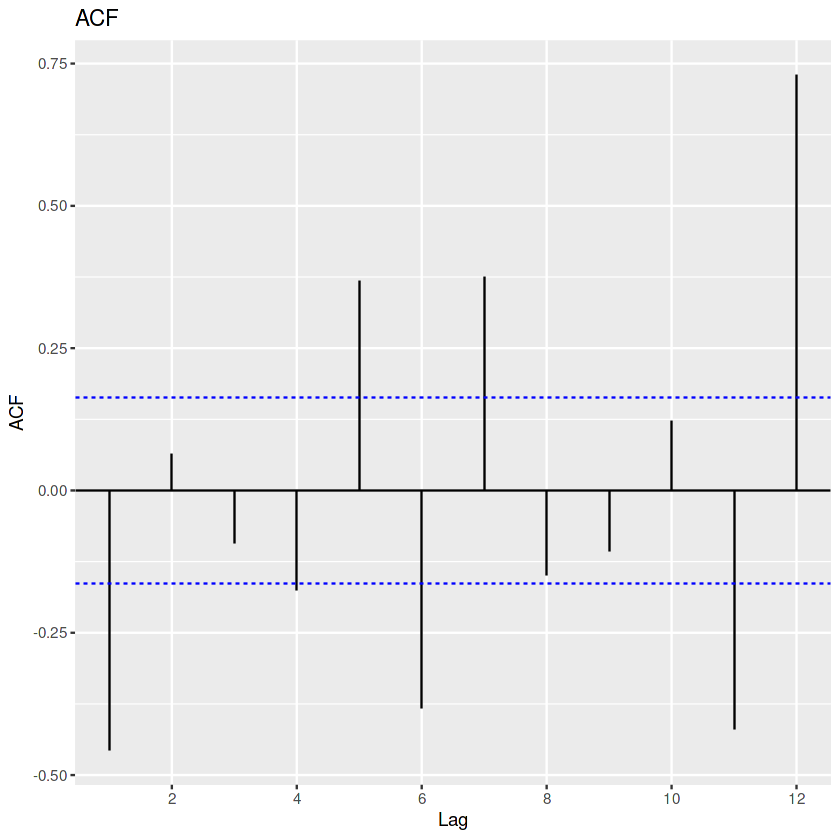

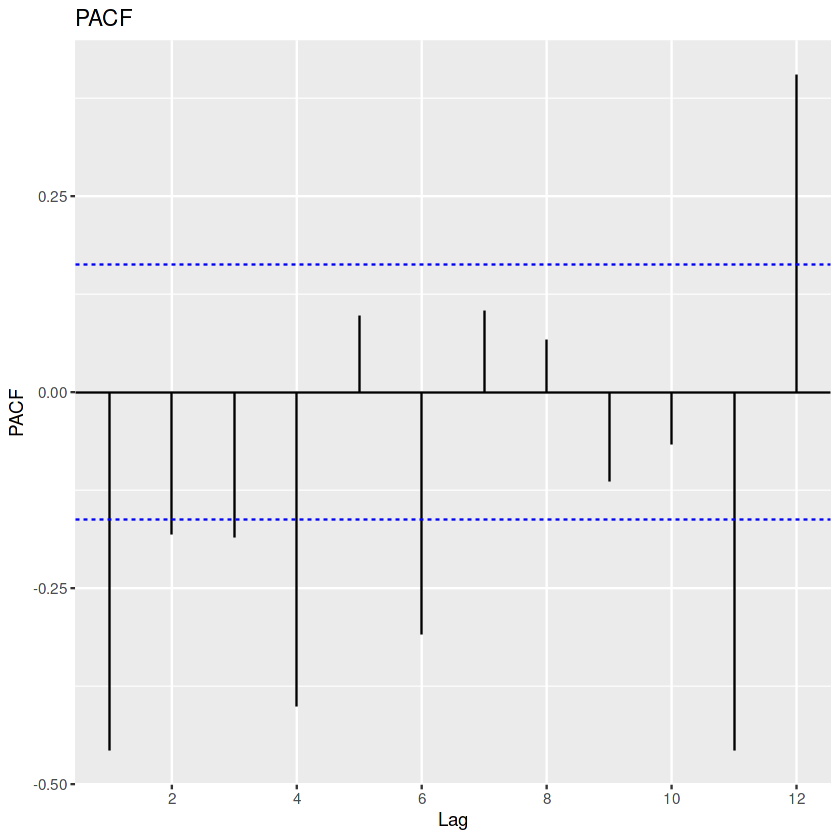

In [18]:
#Membuat Plot ACF dan PACF
ggAcf(ddif1,lag.max = 12) + ggtitle("ACF")
ggPacf(ddif1,lag.max = 12) + ggtitle("PACF")

Dari plot PACF di atas, dapat diketahui bahwa pada 4 lag pertama, lag yang terakhir melewati garis signifikansi adalah lag ke-4. Oleh karena itu, ditentukan parameter p untuk model ARIMA adalah 4.

Sementara dari plot ACF, dapat diketahui bahwa pada 4 lag pertama, lag yang terakhir melewati garis signifikansi adalah lag ke-4. Oleh karena itu, ditentukan parameter q untuk model ARIMA adalah 4.

Sehingga diperoleh model awal ARIMA(4,1,4).

## Underfitting Dengan Konstan

In [19]:
#### Underfitting ARIMA Include Constant ####
c414<-Arima(data,order=c(4,1,4),include.constant = T, lambda = 0)
coeftest(c414)


z test of coefficients:

         Estimate  Std. Error z value  Pr(>|z|)    
ar1   -1.11379165  0.25056981 -4.4450 8.788e-06 ***
ar2   -0.28004794  0.34458405 -0.8127 0.4163826    
ar3    0.00932047  0.18113295  0.0515 0.9589618    
ar4   -0.35109136  0.14076189 -2.4942 0.0126234 *  
ma1    0.76114035  0.26119832  2.9140 0.0035679 ** 
ma2   -0.57350192  0.23685140 -2.4214 0.0154627 *  
ma3   -0.71236392  0.18692655 -3.8109 0.0001384 ***
ma4    0.15817337  0.24146998  0.6550 0.5124397    
drift -0.00041955  0.00068193 -0.6152 0.5383990    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [20]:
c413<-Arima(data,order=c(4,1,3),include.constant = T, lambda = 0)
coeftest(c413)


z test of coefficients:

         Estimate  Std. Error  z value  Pr(>|z|)    
ar1   -1.25524283  0.09831886 -12.7671 < 2.2e-16 ***
ar2   -0.50661687  0.18820546  -2.6918 0.0071061 ** 
ar3   -0.08617827  0.17932583  -0.4806 0.6308235    
ar4   -0.31907375  0.08956644  -3.5624 0.0003674 ***
ma1    0.86497239  0.10301267   8.3968 < 2.2e-16 ***
ma2   -0.35564691  0.12918911  -2.7529 0.0059067 ** 
ma3   -0.80936825  0.10079453  -8.0299 9.757e-16 ***
drift -0.00041274  0.00066039  -0.6250 0.5319696    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [21]:
c412<-Arima(data,order=c(4,1,2),include.constant = T, lambda = 0)
coeftest(c412)


z test of coefficients:

         Estimate  Std. Error z value  Pr(>|z|)    
ar1   -0.77316653  0.17607698 -4.3911 1.128e-05 ***
ar2   -0.22573088  0.24967265 -0.9041   0.36594    
ar3   -0.33475160  0.17688141 -1.8925   0.05842 .  
ar4   -0.44163726  0.09729852 -4.5390 5.652e-06 ***
ma1    0.08140280  0.21198646  0.3840   0.70098    
ma2   -0.33351934  0.17881398 -1.8652   0.06216 .  
drift -0.00040654  0.00093957 -0.4327   0.66525    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [22]:
c411<-Arima(data,order=c(4,1,1),include.constant = T, lambda = 0)
coeftest(c411)


z test of coefficients:

         Estimate  Std. Error  z value  Pr(>|z|)    
ar1   -1.07610898  0.10520781 -10.2284 < 2.2e-16 ***
ar2   -0.65917779  0.11434531  -5.7648 8.175e-09 ***
ar3   -0.56469953  0.10569474  -5.3427 9.155e-08 ***
ar4   -0.50598959  0.07283684  -6.9469 3.734e-12 ***
ma1    0.48673522  0.10390645   4.6844 2.808e-06 ***
drift -0.00043865  0.00135897  -0.3228    0.7469    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [23]:
c410<-Arima(data,order=c(4,1,0),include.constant = T, lambda = 0)
coeftest(c410)


z test of coefficients:

         Estimate  Std. Error z value  Pr(>|z|)    
ar1   -0.69942255  0.07638654 -9.1564 < 2.2e-16 ***
ar2   -0.42892674  0.08814013 -4.8664 1.136e-06 ***
ar3   -0.45711934  0.08728375 -5.2372 1.631e-07 ***
ar4   -0.43804019  0.07598442 -5.7649 8.172e-09 ***
drift -0.00041326  0.00117998 -0.3502    0.7262    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [24]:
c314<-Arima(data,order=c(3,1,4),include.constant = T, lambda = 0)
coeftest(c314)


z test of coefficients:

         Estimate  Std. Error  z value  Pr(>|z|)    
ar1   -0.96409535  0.14847837  -6.4932 8.405e-11 ***
ar2   -0.98009675  0.07083250 -13.8368 < 2.2e-16 ***
ar3   -0.65241773  0.13435412  -4.8560 1.198e-06 ***
ma1    0.27516663  0.13245398   2.0775  0.037760 *  
ma2    0.28119553  0.08827425   3.1855  0.001445 ** 
ma3   -0.25675152  0.10848538  -2.3667  0.017948 *  
ma4   -0.70747674  0.11218072  -6.3066 2.853e-10 ***
drift -0.00035186  0.00059735  -0.5890  0.555831    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [25]:
c313<-Arima(data,order=c(3,1,3),include.constant = T, lambda = 0)
coeftest(c313)


z test of coefficients:

         Estimate  Std. Error  z value Pr(>|z|)    
ar1   -0.23260686  0.10075310  -2.3087  0.02096 *  
ar2   -0.85776649  0.05235113 -16.3849  < 2e-16 ***
ar3   -0.06683472  0.10139858  -0.6591  0.50981    
ma1   -0.52548814  0.06033907  -8.7089  < 2e-16 ***
ma2    0.74193015  0.04105741  18.0706  < 2e-16 ***
ma3   -0.83466872  0.06659429 -12.5336  < 2e-16 ***
drift -0.00034333  0.00063622  -0.5396  0.58944    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [26]:
c312<-Arima(data,order=c(3,1,2),include.constant = T, lambda = 0)
coeftest(c312)


z test of coefficients:

         Estimate  Std. Error z value  Pr(>|z|)    
ar1    0.27068982  0.29651118  0.9129 0.3612867    
ar2    0.01278109  0.10868053  0.1176 0.9063827    
ar3   -0.19143516  0.10413423 -1.8384 0.0660108 .  
ma1   -1.04231923  0.29240932 -3.5646 0.0003644 ***
ma2    0.21169478  0.25572895  0.8278 0.4077786    
drift -0.00038823  0.00070005 -0.5546 0.5791873    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [27]:
c311<-Arima(data,order=c(3,1,1),include.constant = T, lambda = 0)
coeftest(c311)


z test of coefficients:

         Estimate  Std. Error  z value Pr(>|z|)    
ar1    0.05243940  0.10973628   0.4779   0.6327    
ar2    0.05026739  0.10116620   0.4969   0.6193    
ar3   -0.14909302  0.09596042  -1.5537   0.1203    
ma1   -0.82215553  0.07968107 -10.3181   <2e-16 ***
drift -0.00037721  0.00064450  -0.5853   0.5584    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [28]:
c310<-Arima(data,order=c(3,1,0),include.constant = T, lambda = 0)
coeftest(c310)


z test of coefficients:

        Estimate Std. Error z value  Pr(>|z|)    
ar1   -0.6128037  0.0833456 -7.3526 1.944e-13 ***
ar2   -0.2973434  0.0941909 -3.1568  0.001595 ** 
ar3   -0.1992134  0.0834450 -2.3874  0.016970 *  
drift -0.0005413  0.0018662 -0.2901  0.771775    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [29]:
c214<-Arima(data,order=c(2,1,4),include.constant = T, lambda = 0)
coeftest(c214)


z test of coefficients:

         Estimate  Std. Error   z value  Pr(>|z|)    
ar1   -1.72322957  0.00754898 -228.2732 < 2.2e-16 ***
ar2   -0.99344533  0.00631102 -157.4144 < 2.2e-16 ***
ma1    1.29915100  0.07967092   16.3065 < 2.2e-16 ***
ma2   -0.05570404  0.09893811   -0.5630    0.5734    
ma3   -1.09752446  0.09359828  -11.7259 < 2.2e-16 ***
ma4   -0.43439158  0.07047570   -6.1637 7.106e-10 ***
drift -0.00039491  0.00058928   -0.6702    0.5028    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [30]:
c213<-Arima(data,order=c(2,1,3),include.constant = T, lambda = 0)
coeftest(c213)


z test of coefficients:

         Estimate  Std. Error  z value  Pr(>|z|)    
ar1   -1.14127260  0.06807589 -16.7647 < 2.2e-16 ***
ar2   -0.71603826  0.06551425 -10.9295 < 2.2e-16 ***
ma1    0.41166989  0.05786381   7.1145 1.124e-12 ***
ma2   -0.06122508  0.06407016  -0.9556    0.3393    
ma3   -0.84468441  0.06003296 -14.0703 < 2.2e-16 ***
drift -0.00036572  0.00062887  -0.5815    0.5609    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [31]:
c212<-Arima(data,order=c(2,1,2),include.constant = T, lambda = 0)
coeftest(c212)


z test of coefficients:

         Estimate  Std. Error z value Pr(>|z|)  
ar1   -0.13616648  0.33250760 -0.4095  0.68216  
ar2    0.11428207  0.09941835  1.1495  0.25035  
ma1   -0.64264050  0.32400148 -1.9834  0.04732 *
ma2   -0.20189387  0.27325783 -0.7388  0.46000  
drift -0.00036689  0.00058956 -0.6223  0.53374  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [32]:
c211<-Arima(data,order=c(2,1,1),include.constant = T, lambda = 0)
coeftest(c211)


z test of coefficients:

         Estimate  Std. Error  z value Pr(>|z|)    
ar1    0.09543113  0.09962164   0.9579   0.3381    
ar2    0.07756035  0.09643101   0.8043   0.4212    
ma1   -0.87433578  0.05152201 -16.9701   <2e-16 ***
drift -0.00036755  0.00058968  -0.6233   0.5331    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [33]:
c210<-Arima(data,order=c(2,1,0),include.constant = T, lambda = 0)
coeftest(c210)


z test of coefficients:

         Estimate  Std. Error z value  Pr(>|z|)    
ar1   -0.57502865  0.08343907 -6.8916 5.517e-12 ***
ar2   -0.18769309  0.08385534 -2.2383    0.0252 *  
drift -0.00062976  0.00227161 -0.2772    0.7816    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [34]:
c114<-Arima(data,order=c(1,1,4),include.constant = T, lambda = 0)
coeftest(c114)


z test of coefficients:

         Estimate  Std. Error z value  Pr(>|z|)    
ar1    0.04514061  0.30791328  0.1466 0.8834464    
ma1   -0.81896901  0.29398881 -2.7857 0.0053410 ** 
ma2    0.14009427  0.22856726  0.6129 0.5399268    
ma3   -0.38387303  0.10853442 -3.5369 0.0004049 ***
ma4    0.23679300  0.09592828  2.4684 0.0135704 *  
drift -0.00037366  0.00067620 -0.5526 0.5805435    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [35]:
c113<-Arima(data,order=c(1,1,3),include.constant = T, lambda = 0)
coeftest(c113)


z test of coefficients:

         Estimate  Std. Error z value Pr(>|z|)  
ar1   -0.33867422  0.19687180 -1.7203  0.08538 .
ma1   -0.40434357  0.19584785 -2.0646  0.03896 *
ma2   -0.13990199  0.13811370 -1.0129  0.31109  
ma3   -0.26019602  0.11995830 -2.1691  0.03008 *
drift -0.00036201  0.00056629 -0.6393  0.52265  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [36]:
c112<-Arima(data,order=c(1,1,2),include.constant = T, lambda = 0)
coeftest(c112)


z test of coefficients:

         Estimate  Std. Error z value  Pr(>|z|)    
ar1   -0.74023684  0.14305267 -5.1746 2.284e-07 ***
ma1   -0.03476244  0.12843146 -0.2707    0.7866    
ma2   -0.67736300  0.10208344 -6.6354 3.237e-11 ***
drift -0.00037723  0.00063455 -0.5945    0.5522    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [37]:
c111<-Arima(data,order=c(1,1,1),include.constant = T, lambda = 0)
coeftest(c111)


z test of coefficients:

         Estimate  Std. Error  z value Pr(>|z|)    
ar1    0.08171433  0.10068383   0.8116   0.4170    
ma1   -0.85389308  0.05222932 -16.3489   <2e-16 ***
drift -0.00037382  0.00061418  -0.6087   0.5428    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [38]:
c110<-Arima(data,order=c(1,1,0),include.constant = T, lambda = 0)
coeftest(c110)


z test of coefficients:

         Estimate  Std. Error z value  Pr(>|z|)    
ar1   -0.48783938  0.07497994 -6.5063 7.704e-11 ***
drift -0.00071775  0.00273320 -0.2626    0.7929    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [39]:
c014<-Arima(data,order=c(0,1,4),include.constant = T, lambda = 0)
coeftest(c014)


z test of coefficients:

         Estimate  Std. Error z value  Pr(>|z|)    
ma1   -0.77741743  0.08110192 -9.5857 < 2.2e-16 ***
ma2    0.10993338  0.10016718  1.0975  0.272423    
ma3   -0.38195998  0.10464055 -3.6502  0.000262 ***
ma4    0.22947028  0.08277240  2.7723  0.005566 ** 
drift -0.00037115  0.00066847 -0.5552  0.578742    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [40]:
c013<-Arima(data,order=c(0,1,3),include.constant = T, lambda = 0)
coeftest(c013)


z test of coefficients:

         Estimate  Std. Error z value Pr(>|z|)    
ma1   -0.73967683  0.08995823 -8.2224   <2e-16 ***
ma2    0.03916523  0.09521100  0.4114   0.6808    
ma3   -0.15378403  0.10338396 -1.4875   0.1369    
drift -0.00036723  0.00056791 -0.6466   0.5179    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [41]:
c012<-Arima(data,order=c(0,1,2),include.constant = T, lambda = 0)
coeftest(c012)


z test of coefficients:

         Estimate  Std. Error z value Pr(>|z|)    
ma1   -0.78171569  0.07928000 -9.8602   <2e-16 ***
ma2   -0.05686089  0.07664191 -0.7419   0.4581    
drift -0.00037296  0.00062218 -0.5994   0.5489    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [42]:
c011<-Arima(data,order=c(0,1,1),include.constant = T, lambda = 0)
coeftest(c011)


z test of coefficients:

         Estimate  Std. Error  z value Pr(>|z|)    
ma1   -0.82888854  0.05097945 -16.2593   <2e-16 ***
drift -0.00037276  0.00065664  -0.5677   0.5703    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Underfitting Tanpa Konstan

In [43]:
#### Underfitting ARIMA Include Constant ####
tc414<-Arima(data,order=c(4,1,4),include.constant = F, lambda = 0)
coeftest(tc414)


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
ar1 -1.1120875  0.2501970 -4.4448 8.795e-06 ***
ar2 -0.2809122  0.3444174 -0.8156 0.4147201    
ar3  0.0044326  0.1812516  0.0245 0.9804895    
ar4 -0.3549025  0.1403811 -2.5281 0.0114670 *  
ma1  0.7605632  0.2609327  2.9148 0.0035593 ** 
ma2 -0.5695167  0.2372114 -2.4009 0.0163556 *  
ma3 -0.7047114  0.1858789 -3.7912 0.0001499 ***
ma4  0.1627846  0.2405108  0.6768 0.4985147    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [44]:
tc413<-Arima(data,order=c(4,1,3),include.constant = F, lambda = 0)
coeftest(tc413)


z test of coefficients:

     Estimate Std. Error  z value  Pr(>|z|)    
ar1 -1.258533   0.098506 -12.7762 < 2.2e-16 ***
ar2 -0.512881   0.188709  -2.7178  0.006571 ** 
ar3 -0.090532   0.179639  -0.5040  0.614284    
ar4 -0.319720   0.089559  -3.5700  0.000357 ***
ma1  0.869221   0.102127   8.5112 < 2.2e-16 ***
ma2 -0.347757   0.129877  -2.6776  0.007415 ** 
ma3 -0.803858   0.100409  -8.0058 1.187e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [45]:
tc412<-Arima(data,order=c(4,1,2),include.constant = F, lambda = 0)
coeftest(tc412)


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.778658   0.175188 -4.4447 8.801e-06 ***
ar2 -0.234472   0.247387 -0.9478   0.34323    
ar3 -0.339957   0.174854 -1.9442   0.05187 .  
ar4 -0.443279   0.096355 -4.6005 4.215e-06 ***
ma1  0.088251   0.210451  0.4193   0.67497    
ma2 -0.327586   0.176978 -1.8510   0.06417 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [46]:
tc411<-Arima(data,order=c(4,1,1),include.constant = F, lambda = 0)
coeftest(tc411)


z test of coefficients:

     Estimate Std. Error  z value  Pr(>|z|)    
ar1 -1.076217   0.105208 -10.2294 < 2.2e-16 ***
ar2 -0.659080   0.114380  -5.7622 8.302e-09 ***
ar3 -0.564552   0.105731  -5.3395 9.320e-08 ***
ar4 -0.505958   0.072862  -6.9441 3.810e-12 ***
ma1  0.486778   0.103877   4.6861 2.785e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [47]:
tc410<-Arima(data,order=c(4,1,0),include.constant = F, lambda = 0)
coeftest(tc410)


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.699479   0.076418 -9.1533 < 2.2e-16 ***
ar2 -0.428717   0.088176 -4.8620 1.162e-06 ***
ar3 -0.456980   0.087320 -5.2334 1.664e-07 ***
ar4 -0.437940   0.076017 -5.7611 8.357e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [48]:
tc314<-Arima(data,order=c(3,1,4),include.constant = F, lambda = 0)
coeftest(tc314)


z test of coefficients:

     Estimate Std. Error  z value  Pr(>|z|)    
ar1 -0.964951   0.149018  -6.4754 9.456e-11 ***
ar2 -0.979793   0.070857 -13.8278 < 2.2e-16 ***
ar3 -0.653212   0.134795  -4.8460 1.260e-06 ***
ma1  0.278671   0.133055   2.0944  0.036224 *  
ma2  0.284443   0.088333   3.2201  0.001281 ** 
ma3 -0.252575   0.109037  -2.3164  0.020536 *  
ma4 -0.705312   0.112332  -6.2788 3.412e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [49]:
tc313<-Arima(data,order=c(3,1,3),include.constant = F, lambda = 0)
coeftest(tc313)


z test of coefficients:

     Estimate Std. Error  z value Pr(>|z|)    
ar1 -0.235030   0.100854  -2.3304  0.01978 *  
ar2 -0.858846   0.052365 -16.4012  < 2e-16 ***
ar3 -0.069820   0.101464  -0.6881  0.49137    
ma1 -0.521520   0.060779  -8.5807  < 2e-16 ***
ma2  0.743274   0.041066  18.0993  < 2e-16 ***
ma3 -0.830570   0.066900 -12.4151  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [50]:
tc312<-Arima(data,order=c(3,1,2),include.constant = F, lambda = 0)
coeftest(tc312)


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
ar1  0.2716085  0.2950779  0.9205 0.3573305    
ar2  0.0097089  0.1086985  0.0893 0.9288282    
ar3 -0.1942817  0.1042204 -1.8641 0.0623017 .  
ma1 -1.0417570  0.2911069 -3.5786 0.0003454 ***
ma2  0.2162078  0.2532344  0.8538 0.3932239    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [51]:
tc311<-Arima(data,order=c(3,1,1),include.constant = F, lambda = 0)
coeftest(tc311)


z test of coefficients:

     Estimate Std. Error  z value Pr(>|z|)    
ar1  0.048501   0.110265   0.4399   0.6600    
ar2  0.048155   0.101440   0.4747   0.6350    
ar3 -0.150659   0.095987  -1.5696   0.1165    
ma1 -0.816718   0.080717 -10.1183   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [52]:
tc310<-Arima(data,order=c(3,1,0),include.constant = F, lambda = 0)
coeftest(tc310)


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.612885   0.083369 -7.3515 1.961e-13 ***
ar2 -0.297194   0.094217 -3.1543  0.001609 ** 
ar3 -0.199137   0.083469 -2.3858  0.017044 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [53]:
tc214<-Arima(data,order=c(2,1,4),include.constant = F, lambda = 0)
coeftest(tc214)


z test of coefficients:

      Estimate Std. Error   z value  Pr(>|z|)    
ar1 -1.7233197  0.0075194 -229.1835 < 2.2e-16 ***
ar2 -0.9935219  0.0062788 -158.2346 < 2.2e-16 ***
ma1  1.3026002  0.0799395   16.2948 < 2.2e-16 ***
ma2 -0.0475617  0.0997618   -0.4768    0.6335    
ma3 -1.0900260  0.0938773  -11.6112 < 2.2e-16 ***
ma4 -0.4318200  0.0704007   -6.1337 8.583e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [54]:
tc213<-Arima(data,order=c(2,1,3),include.constant = F, lambda = 0)
coeftest(tc213)


z test of coefficients:

     Estimate Std. Error  z value  Pr(>|z|)    
ar1 -1.142276   0.068050 -16.7859 < 2.2e-16 ***
ar2 -0.716643   0.065502 -10.9408 < 2.2e-16 ***
ma1  0.415192   0.058080   7.1487 8.762e-13 ***
ma2 -0.057025   0.064358  -0.8861    0.3756    
ma3 -0.841265   0.060200 -13.9746 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [55]:
tc212<-Arima(data,order=c(2,1,2),include.constant = F, lambda = 0)
coeftest(tc212)


z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)  
ar1 -0.139575   0.333346 -0.4187  0.67543  
ar2  0.112923   0.099423  1.1358  0.25605  
ma1 -0.637764   0.324837 -1.9633  0.04961 *
ma2 -0.201731   0.272646 -0.7399  0.45936  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [56]:
tc211<-Arima(data,order=c(2,1,1),include.constant = F, lambda = 0)
coeftest(tc211)


z test of coefficients:

     Estimate Std. Error  z value Pr(>|z|)    
ar1  0.092805   0.099852   0.9294   0.3527    
ar2  0.076475   0.096568   0.7919   0.4284    
ma1 -0.870219   0.052112 -16.6990   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [57]:
tc210<-Arima(data,order=c(2,1,0),include.constant = F, lambda = 0)
coeftest(tc210)


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.575101   0.083461 -6.8907 5.552e-12 ***
ar2 -0.187581   0.083877 -2.2364   0.02533 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [58]:
tc114<-Arima(data,order=c(1,1,4),include.constant = F, lambda = 0)
coeftest(tc114)


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ar1  0.048200   0.307423  0.1568 0.8754131    
ma1 -0.820780   0.293332 -2.7981 0.0051400 ** 
ma2  0.143566   0.227924  0.6299 0.5287699    
ma3 -0.383888   0.108582 -3.5355 0.0004071 ***
ma4  0.239049   0.095668  2.4987 0.0124638 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [59]:
tc113<-Arima(data,order=c(1,1,3),include.constant = F, lambda = 0)
coeftest(tc113)


z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)  
ar1 -0.34021    0.19659 -1.7306  0.08353 .
ma1 -0.40113    0.19569 -2.0498  0.04038 *
ma2 -0.13899    0.13771 -1.0093  0.31284  
ma3 -0.25840    0.12002 -2.1529  0.03133 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [60]:
tc112<-Arima(data,order=c(1,1,2),include.constant = F, lambda = 0)
coeftest(tc112)


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.740524   0.143338 -5.1663 2.388e-07 ***
ma1 -0.031672   0.129164 -0.2452    0.8063    
ma2 -0.674265   0.102422 -6.5832 4.605e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [61]:
tc111<-Arima(data,order=c(1,1,1),include.constant = F, lambda = 0)
coeftest(tc111)


z test of coefficients:

     Estimate Std. Error  z value Pr(>|z|)    
ar1  0.078860   0.100850   0.7819   0.4342    
ma1 -0.849770   0.052707 -16.1225   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [62]:
tc110<-Arima(data,order=c(1,1,0),include.constant = F, lambda = 0)
coeftest(tc110)


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.487976   0.074996 -6.5067 7.681e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [63]:
tc014<-Arima(data,order=c(0,1,4),include.constant = F, lambda = 0)
coeftest(tc014)


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ma1 -0.776418   0.081145 -9.5683 < 2.2e-16 ***
ma2  0.111395   0.100192  1.1118 0.2662160    
ma3 -0.381751   0.104418 -3.6560 0.0002562 ***
ma4  0.231246   0.082617  2.7990 0.0051258 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [64]:
tc013<-Arima(data,order=c(0,1,3),include.constant = F, lambda = 0)
coeftest(tc013)


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ma1 -0.738259   0.090129 -8.1912 2.587e-16 ***
ma2  0.039897   0.095258  0.4188    0.6753    
ma3 -0.151518   0.103436 -1.4648    0.1430    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [65]:
tc012<-Arima(data,order=c(0,1,2),include.constant = F, lambda = 0)
coeftest(tc012)


z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)    
ma1 -0.779963   0.079459 -9.8159   <2e-16 ***
ma2 -0.054828   0.076529 -0.7164   0.4737    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [66]:
tc011<-Arima(data,order=c(0,1,1),include.constant = F, lambda = 0)
coeftest(tc011)


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ma1 -0.825479   0.051126 -16.146 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Pemilihan Model
Dilakukan pemilihan model yang layak digunakan, yaitu yang memenuhi kriteria:
- Model tidak invertible
- Semua parameternya signifikan

Dari hasil underfitting, berikut adalah model-model yang layak digunakan:
- ARIMA(4,1,1) tanpa konstanta
- ARIMA(4,1,0) tanpa konstanta
- ARIMA(3,1,4) tanpa konstanta
- ARIMA(3,1,0) tanpa konstanta
- ARIMA(2,1,0) tanpa konstanta
- ARIMA(1,1,0) tanpa konstanta
- ARIMA(0,1,1) tanpa konstanta

# **Diagnostic Checking**


	Box-Ljung test

data:  tc411$residuals
X-squared = 0.00058666, df = 1, p-value = 0.9807



	Box-Ljung test

data:  (tc411$residuals)^2
X-squared = 0.011284, df = 1, p-value = 0.9154



	Jarque Bera Test

data:  tc411$residuals
X-squared = 80.122, df = 2, p-value < 2.2e-16



	Ljung-Box test

data:  Residuals from ARIMA(4,1,1)
Q* = 118.75, df = 19, p-value = 2.22e-16

Model df: 5.   Total lags used: 24



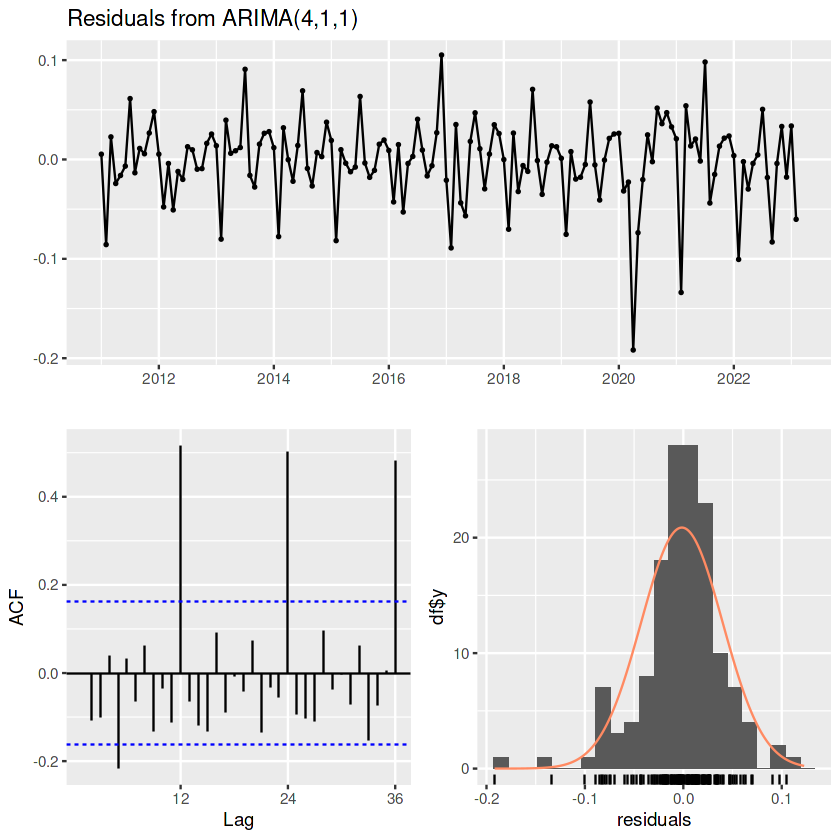

In [67]:
Box.test(tc411$residuals,type="Ljung") #uji autokorelasi
Box.test((tc411$residuals)^2,type="Ljung") #uji homoskedastik
jarque.bera.test(tc411$residuals) #uji normalitas
checkresiduals(tc411)


	Box-Ljung test

data:  tc410$residuals
X-squared = 0.3103, df = 1, p-value = 0.5775



	Box-Ljung test

data:  (tc410$residuals)^2
X-squared = 0.016007, df = 1, p-value = 0.8993



	Jarque Bera Test

data:  tc410$residuals
X-squared = 70.708, df = 2, p-value = 4.441e-16



	Ljung-Box test

data:  Residuals from ARIMA(4,1,0)
Q* = 125.48, df = 20, p-value < 2.2e-16

Model df: 4.   Total lags used: 24



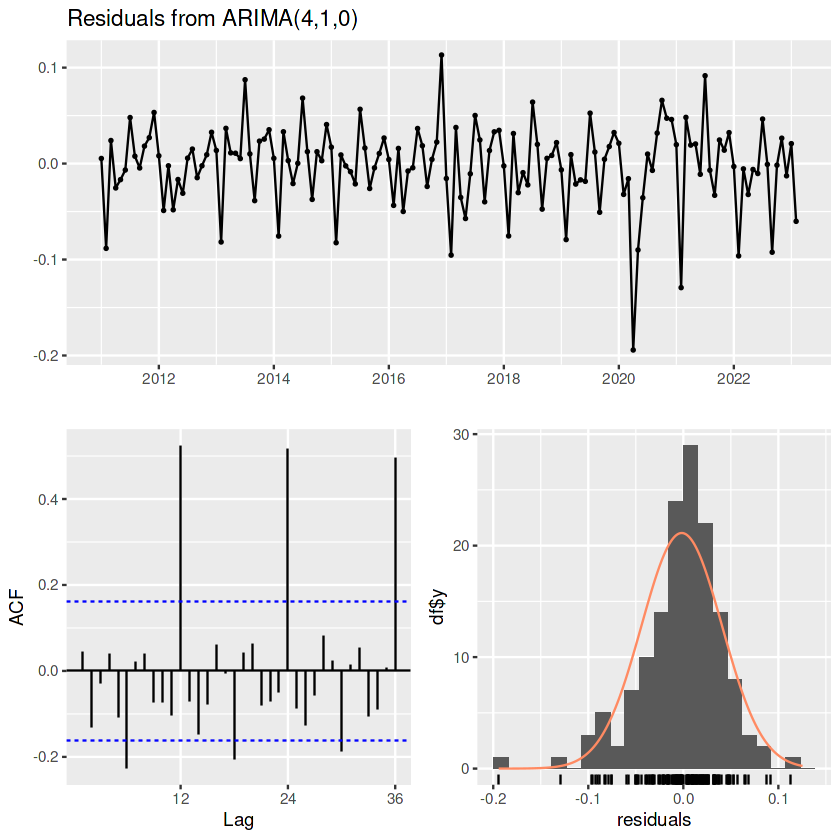

In [68]:
Box.test(tc410$residuals,type="Ljung") #uji autokorelasi
Box.test((tc410$residuals)^2,type="Ljung") #uji homoskedastik
jarque.bera.test(tc410$residuals) #uji normalitas
checkresiduals(tc410)


	Box-Ljung test

data:  tc314$residuals
X-squared = 0.47321, df = 1, p-value = 0.4915



	Box-Ljung test

data:  (tc314$residuals)^2
X-squared = 0.040377, df = 1, p-value = 0.8407



	Jarque Bera Test

data:  tc314$residuals
X-squared = 96.226, df = 2, p-value < 2.2e-16



	Ljung-Box test

data:  Residuals from ARIMA(3,1,4)
Q* = 162.32, df = 17, p-value < 2.2e-16

Model df: 7.   Total lags used: 24



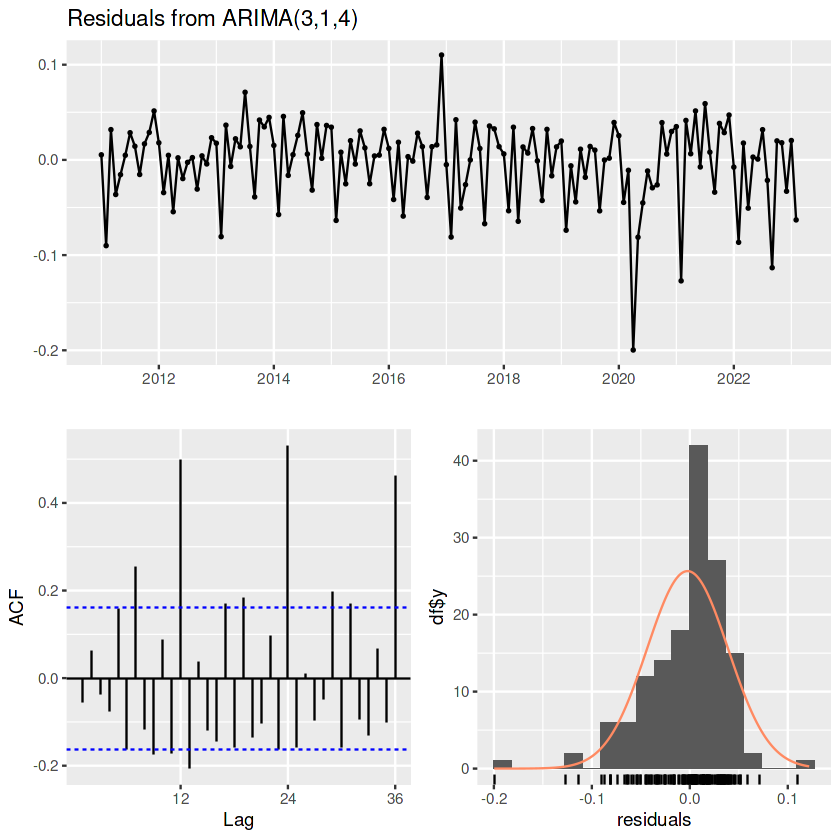

In [69]:
Box.test(tc314$residuals,type="Ljung") #uji autokorelasi
Box.test((tc314$residuals)^2,type="Ljung") #uji homoskedastik
jarque.bera.test(tc314$residuals) #uji normalitas
checkresiduals(tc314)


	Box-Ljung test

data:  tc310$residuals
X-squared = 0.86181, df = 1, p-value = 0.3532



	Box-Ljung test

data:  (tc310$residuals)^2
X-squared = 0.99546, df = 1, p-value = 0.3184



	Jarque Bera Test

data:  tc310$residuals
X-squared = 97.209, df = 2, p-value < 2.2e-16



	Ljung-Box test

data:  Residuals from ARIMA(3,1,0)
Q* = 235.95, df = 21, p-value < 2.2e-16

Model df: 3.   Total lags used: 24



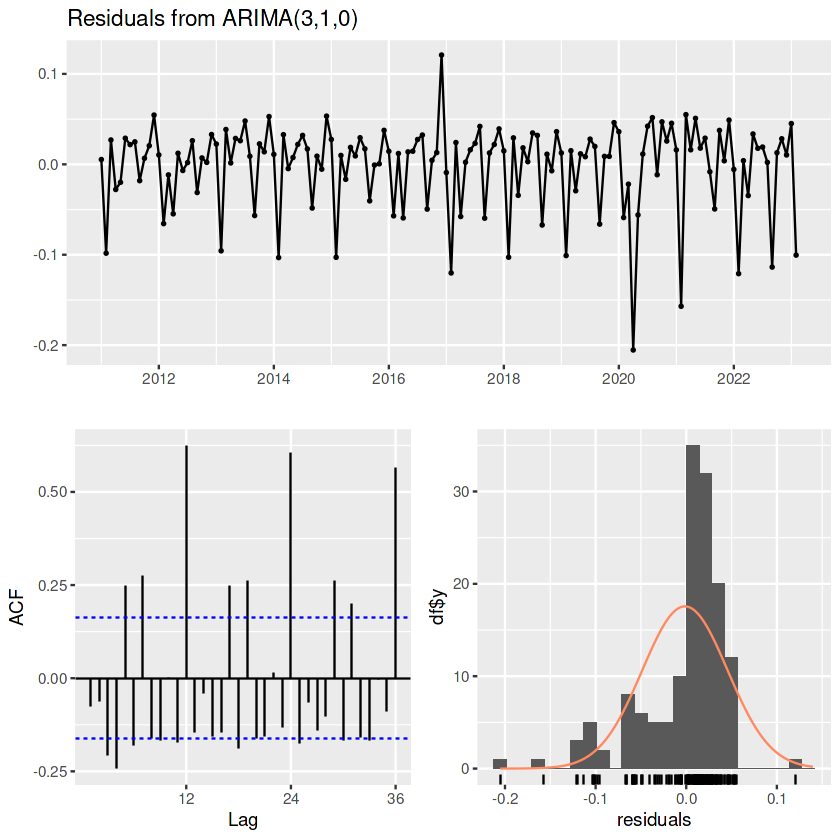

In [70]:
Box.test(tc310$residuals,type="Ljung") #uji autokorelasi
Box.test((tc310$residuals)^2,type="Ljung") #uji homoskedastik
jarque.bera.test(tc310$residuals) #uji normalitas
checkresiduals(tc310)


	Box-Ljung test

data:  tc210$residuals
X-squared = 0.12667, df = 1, p-value = 0.7219



	Box-Ljung test

data:  (tc210$residuals)^2
X-squared = 2.163, df = 1, p-value = 0.1414



	Jarque Bera Test

data:  tc210$residuals
X-squared = 78.926, df = 2, p-value < 2.2e-16



	Ljung-Box test

data:  Residuals from ARIMA(2,1,0)
Q* = 224.33, df = 22, p-value < 2.2e-16

Model df: 2.   Total lags used: 24



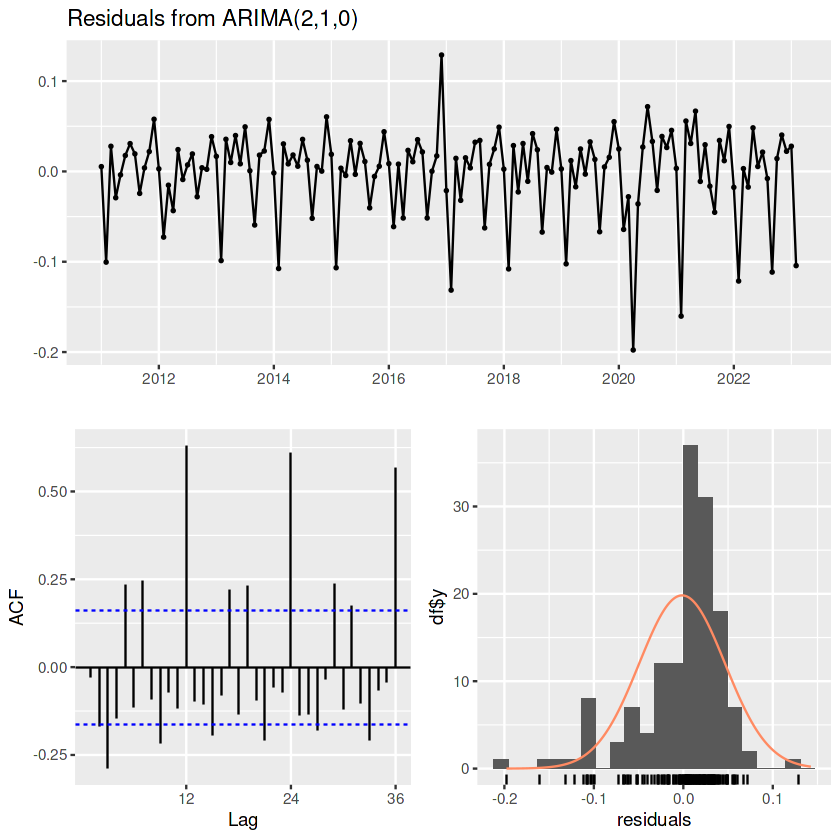

In [71]:
Box.test(tc210$residuals,type="Ljung") #uji autokorelasi
Box.test((tc210$residuals)^2,type="Ljung") #uji homoskedastik
jarque.bera.test(tc210$residuals) #uji normalitas
checkresiduals(tc210)


	Box-Ljung test

data:  tc110$residuals
X-squared = 0.91466, df = 1, p-value = 0.3389



	Box-Ljung test

data:  (tc110$residuals)^2
X-squared = 1.2387, df = 1, p-value = 0.2657



	Jarque Bera Test

data:  tc110$residuals
X-squared = 79.833, df = 2, p-value < 2.2e-16



	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)
Q* = 226.89, df = 23, p-value < 2.2e-16

Model df: 1.   Total lags used: 24



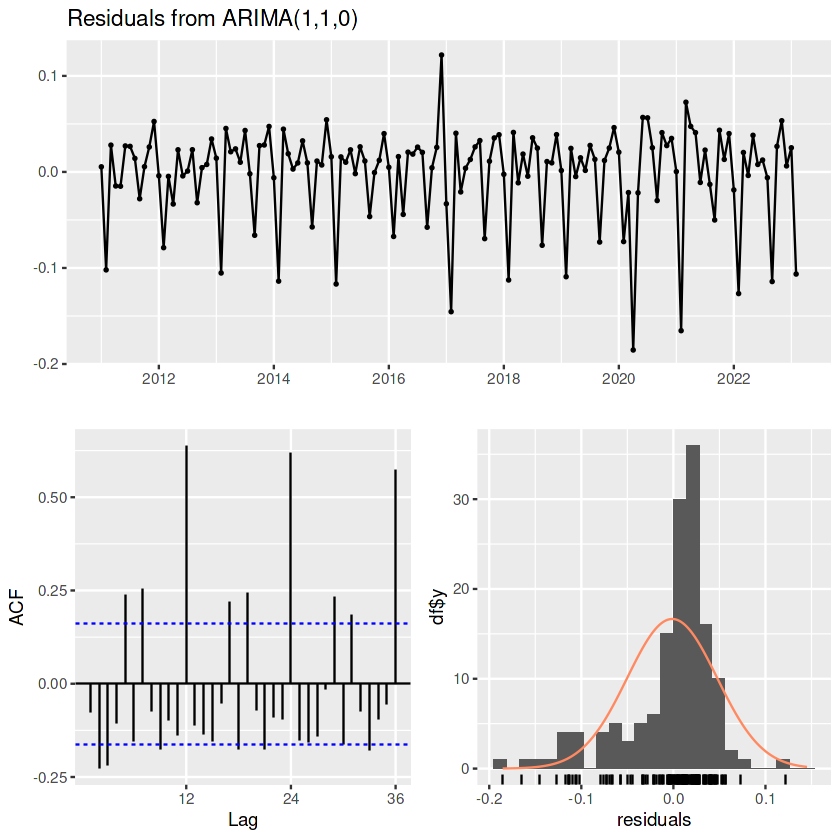

In [72]:
Box.test(tc110$residuals,type="Ljung") #uji autokorelasi
Box.test((tc110$residuals)^2,type="Ljung") #uji homoskedastik
jarque.bera.test(tc110$residuals) #uji normalitas
checkresiduals(tc110)


	Box-Ljung test

data:  tc011$residuals
X-squared = 0.45927, df = 1, p-value = 0.498



	Box-Ljung test

data:  (tc011$residuals)^2
X-squared = 0.27815, df = 1, p-value = 0.5979



	Jarque Bera Test

data:  tc011$residuals
X-squared = 96.936, df = 2, p-value < 2.2e-16



	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 170.62, df = 23, p-value < 2.2e-16

Model df: 1.   Total lags used: 24



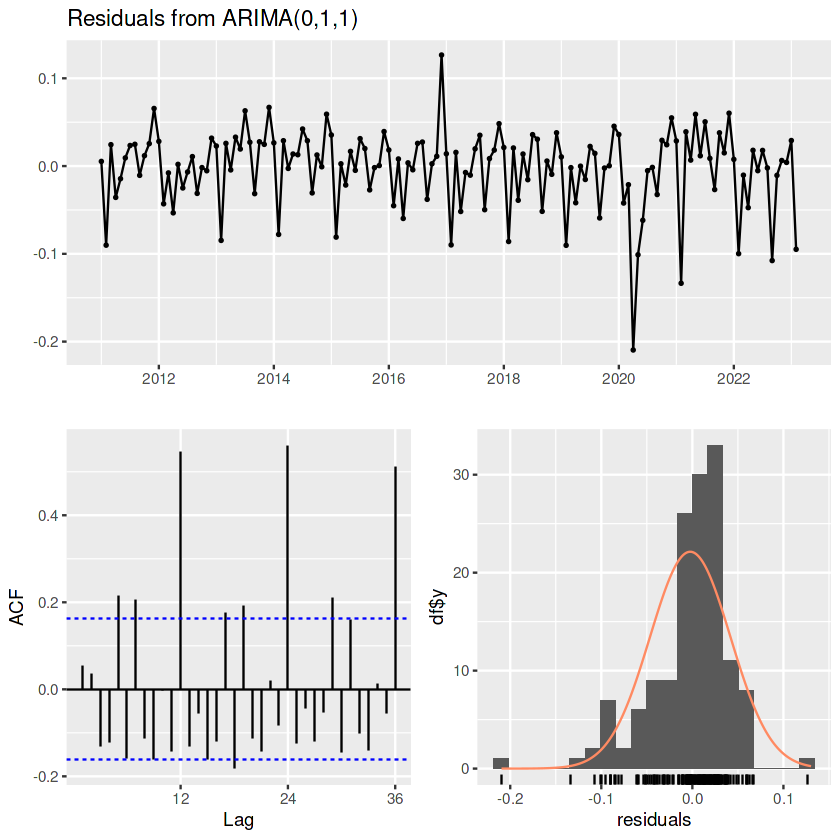

In [73]:
Box.test(tc011$residuals,type="Ljung") #uji autokorelasi
Box.test((tc011$residuals)^2,type="Ljung") #uji homoskedastik
jarque.bera.test(tc011$residuals) #uji normalitas
checkresiduals(tc011)

Dari seluruh model yang layak digunakan, semuanya memenuhi diagnostic checking: tidak terjadi autokorelasi pada residual dan residual bersifat homoskedastik, dan tidak memenuhi asumsi residual berdistribusi normal. Oleh karena itu, model-model ini akan diikutkan semua dalam pemilihan model terbaik.

# **Pemilihan Model Terbaik**
Model terbaik dipilih berdasarkan nilai LogLikelihood, AIC, dan BIC. Model dikatakan terbaik apabila memiliki:
- Nilai Loglik yang paling besar
- Nilai AIC yang paling kecil
- Nilai BIC yang paling kecil

In [74]:
tc411
tc410
tc314
tc310
tc210
tc110
tc011

mod_tc411 = data.frame(Model = "tc411", LogLik = logLik(tc411), AIC = AIC(tc411), BIC = BIC(tc411))
mod_tc410 = data.frame(Model = "tc410", LogLik = logLik(tc410), AIC = AIC(tc410), BIC = BIC(tc410))
mod_tc314 = data.frame(Model = "tc314", LogLik = logLik(tc314), AIC = AIC(tc314), BIC = BIC(tc314))
mod_tc310 = data.frame(Model = "tc310", LogLik = logLik(tc310), AIC = AIC(tc310), BIC = BIC(tc310))
mod_tc210 = data.frame(Model = "tc210", LogLik = logLik(tc210), AIC = AIC(tc210), BIC = BIC(tc210))
mod_tc110 = data.frame(Model = "tc110", LogLik = logLik(tc110), AIC = AIC(tc110), BIC = BIC(tc110))
mod_tc011 = data.frame(Model = "tc011", LogLik = logLik(tc011), AIC = AIC(tc011), BIC = BIC(tc011))

model_selection = rbind(mod_tc411, mod_tc410, mod_tc314, mod_tc310, mod_tc210, mod_tc110, mod_tc011)
model_selection

Series: data 
ARIMA(4,1,1) 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4     ma1
      -1.0762  -0.6591  -0.5646  -0.5060  0.4868
s.e.   0.1052   0.1144   0.1057   0.0729  0.1039

sigma^2 = 0.001779:  log likelihood = 255.05
AIC=-498.1   AICc=-497.49   BIC=-480.24

Series: data 
ARIMA(4,1,0) 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4
      -0.6995  -0.4287  -0.4570  -0.4379
s.e.   0.0764   0.0882   0.0873   0.0760

sigma^2 = 0.001849:  log likelihood = 251.89
AIC=-493.79   AICc=-493.35   BIC=-478.9

Series: data 
ARIMA(3,1,4) 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1      ar2      ar3     ma1     ma2      ma3      ma4
      -0.965  -0.9798  -0.6532  0.2787  0.2844  -0.2526  -0.7053
s.e.   0.149   0.0709   0.1348  0.1331  0.0883   0.1090   0.1123

sigma^2 = 0.001805:  log likelihood = 253.04
AIC=-490.07   AICc=-489.01   BIC=-466.26

Series: data 
ARIMA(3,1,0) 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3
      -0.6129  -0.2972  -0.1991
s.e.   0.0834   0.0942   0.0835

sigma^2 = 0.002263:  log likelihood = 237.16
AIC=-466.32   AICc=-466.03   BIC=-454.41

Series: data 
ARIMA(2,1,0) 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2
      -0.5751  -0.1876
s.e.   0.0835   0.0839

sigma^2 = 0.002337:  log likelihood = 234.37
AIC=-462.74   AICc=-462.57   BIC=-453.81

Series: data 
ARIMA(1,1,0) 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1
      -0.488
s.e.   0.075

sigma^2 = 0.002402:  log likelihood = 231.91
AIC=-459.83   AICc=-459.74   BIC=-453.88

Series: data 
ARIMA(0,1,1) 
Box Cox transformation: lambda= 0 

Coefficients:
          ma1
      -0.8255
s.e.   0.0511

sigma^2 = 0.001975:  log likelihood = 245.67
AIC=-487.33   AICc=-487.25   BIC=-481.38

Model,LogLik,AIC,BIC
<chr>,<dbl>,<dbl>,<dbl>
tc411,255.0496,-498.0992,-480.2388
tc410,251.8932,-493.7864,-478.9027
tc314,253.0362,-490.0723,-466.2584
tc310,237.1575,-466.3151,-454.4082
tc210,234.3709,-462.7418,-453.8116
tc110,231.9144,-459.8287,-453.8753
tc011,245.6674,-487.3348,-481.3813


Diperoleh bahwa model ARIMA(4,1,1) tanpa konstanta paling banyak memenuhi
kriteria model terbaik (2 dari 3 kriteria), yaitu memiliki Log Likelihood terbesar dan AIC terkecil. Oleh karen aitu, model ARIMA(4,1,1) dipilih sebagai model terbaik.

# **Model Terbaik**

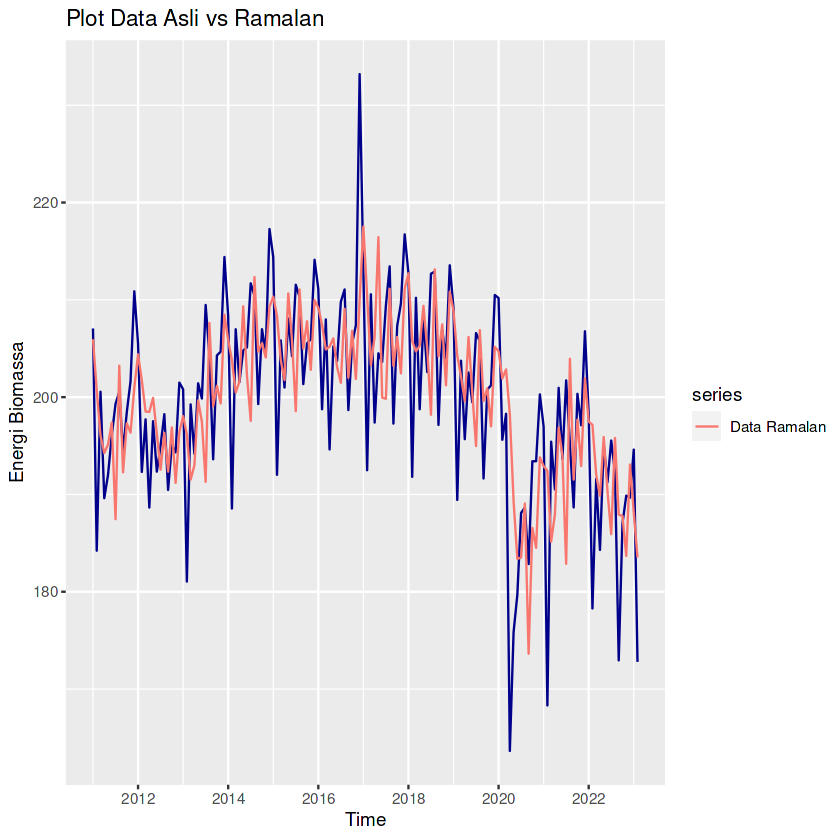

In [75]:
#Best model
##Plot##
autoplot(tc411$x, col="darkblue") +
autolayer(fitted(tc411), series = "Data Ramalan") +
ylab("Energi Biomassa") +
ggtitle("Plot Data Asli vs Ramalan")

Dari plot di atas, terlihat bahwa hasil peramalan dengan model ARIMA(4,1,1) tanpa
konstanta tidak jauh berbeda dengan data asli. Oleh karena itu, dapat dikatakan bahwa model ARIMA(4,1,1) tanpa konstanta mampu memprediksi data Biomass Energy
dengan baik.

# **Prediksi 3 Periode ke depan**

In [76]:
##Forecast and Accuracy##
accuracy(tc411)
forecast(tc411,3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.1804464,8.017024,5.759933,-0.2324771,2.948374,0.9621813,-0.00793059


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Mar 2023       186.1932 176.3956 196.5349 171.4195 202.2401
Apr 2023       183.2442 172.8433 194.2709 167.5786 200.3742
May 2023       187.3345 176.0646 199.3258 170.3757 205.9812